In [259]:
import pymongo
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np

In [260]:
total_data = {4: {"month": "april", "count" : 0, "days" : [0]*31, "hours": [0]*24}, 
            5 : {"month": "may", "count" : 0, "days" : [0]*31, "hours": [0]*24},
              6 : {"month": "june", "count" : 0, "days" : [0]*31, "hours": [0]*24},
              7 : {"month": "july","count" : 0, "days" : [0]*31, "hours": [0]*24},
              8: {"month": "august", "count" : 0, "days" : [0]*31, "hours": [0]*24},
              9: {"month": "september", "count" : 0, "days" : [0]*31, "hours": [0]*24}}

In [261]:
# Connect to database
client = pymongo.MongoClient("localhost", 27017)
db = client['uber_data_set']
collection = db.list_collection_names()

In [262]:
for each in collection:
    cursor = db[each].find({}, no_cursor_timeout=True)
    for x in cursor:
        try:
            date_str = x['Date/Time']
            num = int(date_str.split("/")[0])
            total_data[num]['count'] += 1
            hour = int(date_str.split(" ")[1].split(":")[0])
            total_data[num]['hours'][hour] += 1
            day = int(date_str.split("/")[1]) - 1
            total_data[num]['days'][day] += 1
        except Exception as e:
            print("ereepe"+str(e))

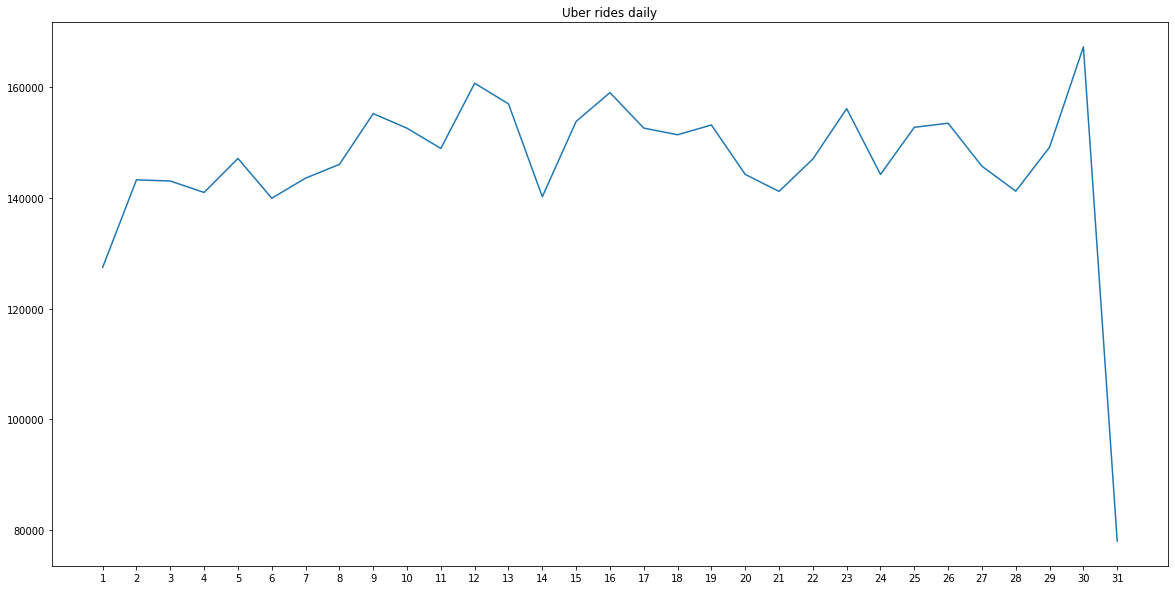

In [263]:
#  Line chart of hourly uber rides
plt.figure(figsize=(20,10))
plt.title("Uber rides daily")
y = [0]*31
for i, row in enumerate(total_data):
    m = total_data[row]['days']
    for i,val in enumerate(m):
        y[i] = y[i] + val
        
x = np.arange(1,32)
d = [str(i) for i in range(1,32)]

plt.xticks(x, d)
plt.plot(x,y)
plt.show()
fig.savefig('Histogram-Daily-LineChart.png', dpi=100)

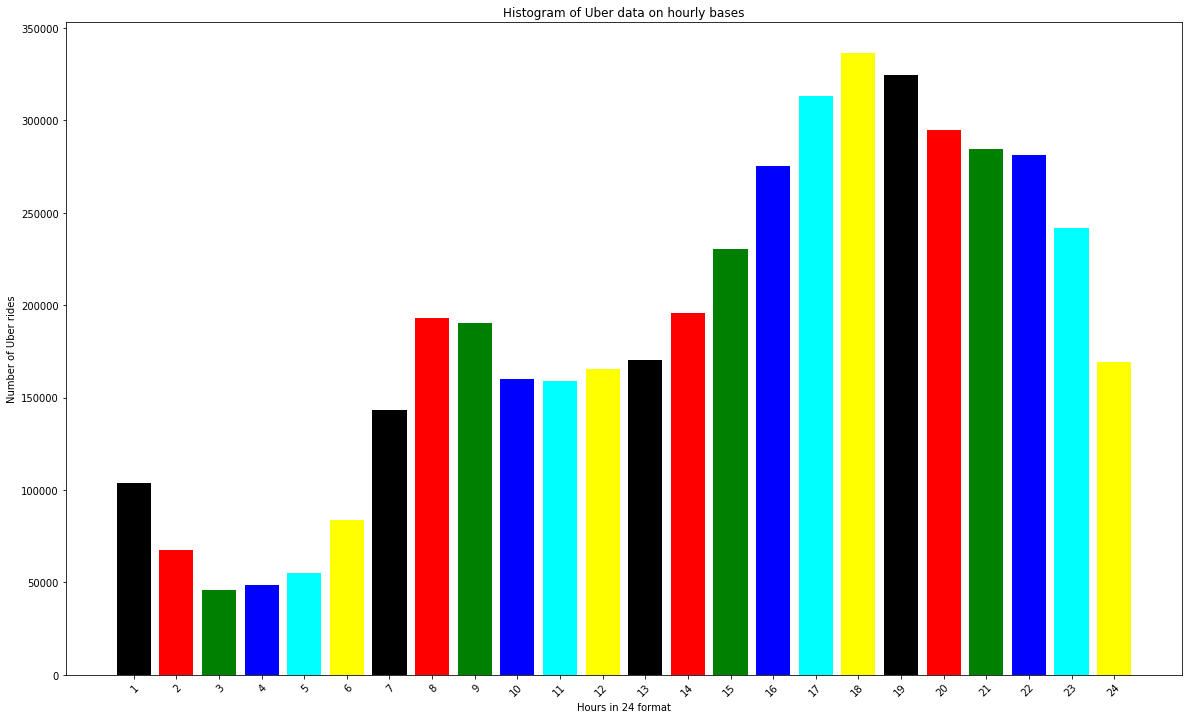

In [264]:
# Plot histogram of data on hourly basis
data = [0]*24
for i, row in enumerate(total_data):
    m = total_data[row]['hours']
    for i,val in enumerate(m):
        data[i] = data[i] + val
    
my_bins = [i for i in range(1,25)]
fig, ax = plt.subplots()

fig = plt.gcf()
fig.set_size_inches(20, 12)
ax.title.set_text("Histogram of Uber data on hourly bases") 
ax.set_xlabel('Hours in 24 format')
ax.set_ylabel('Number of Uber rides')

ax.bar(my_bins, data, color=['black', 'red', 'green', 'blue', 'cyan', 'yellow'])
ax.set_xticks(my_bins)
ax.set_xticklabels(my_bins,rotation=45, rotation_mode="anchor", ha="right")
plt.show()
fig.savefig('Histogram-Hourly.png', dpi=100)

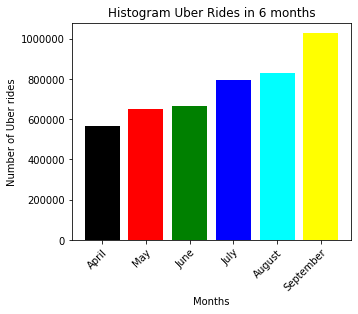

In [276]:
# Plot histogram of data on hourly basis
data = []
for i, row in enumerate(total_data):
    m = total_data[row]['count']
    data.append(m)
    
my_bins = ['April', 'May', 'June', 'July', 'August', 'September']
fig, ax = plt.subplots()

fig = plt.gcf()
fig.set_size_inches(5, 4)
ax.title.set_text("Histogram Uber Rides in 6 months") 
ax.set_xlabel('Months')
ax.set_ylabel('Number of Uber rides')

ax.bar(my_bins, data, color=['black', 'red', 'green', 'blue', 'cyan', 'yellow'])
ax.set_xticks(my_bins)
ax.set_xticklabels(my_bins,rotation=45, rotation_mode="anchor", ha="right")
plt.show()
fig.savefig('Hist-Total-Uber-Rides.png', dpi=100)

<Figure size 1600x800 with 0 Axes>

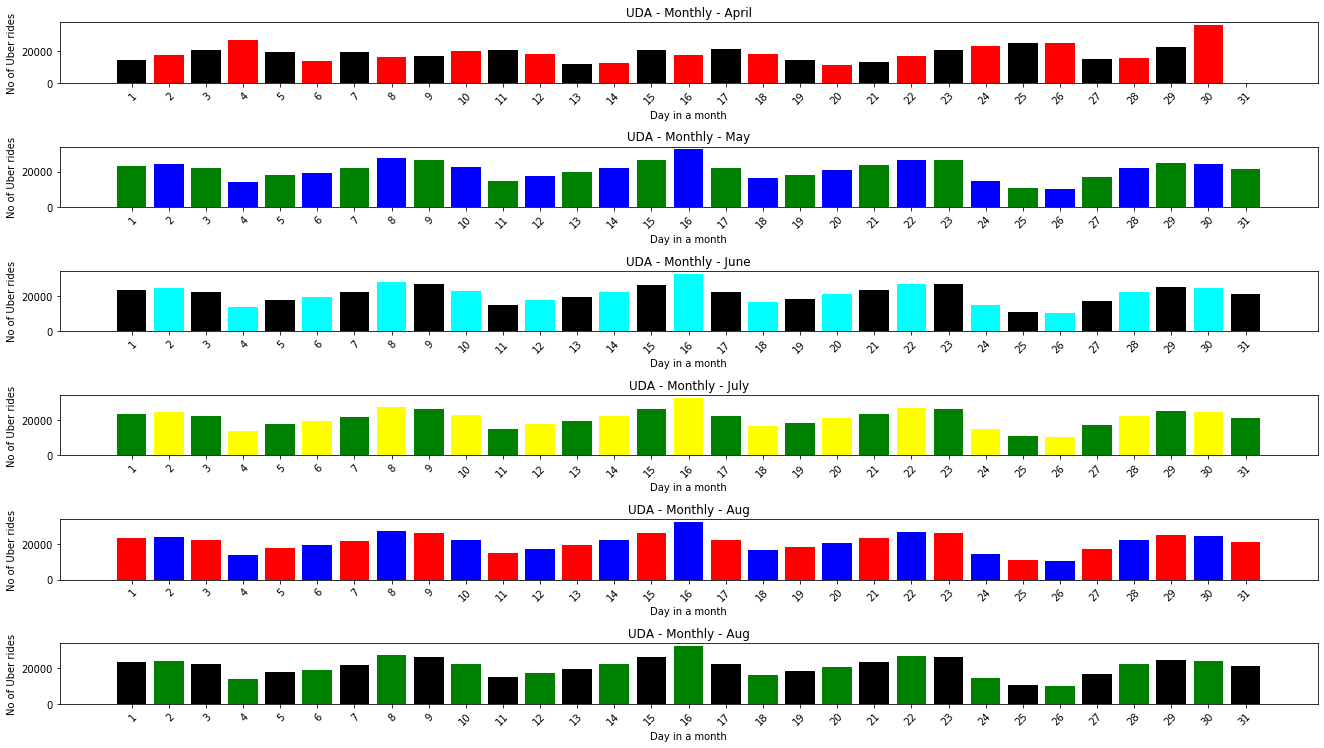

In [273]:
#GRAPHS
from matplotlib.pyplot import figure
# pprint(total_data)
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
fig, (ax_april, ax_may , ax_june, ax_july, ax_aug, ax_sep) = plt.subplots(6)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
my_bins = [i for i in range(1,32)]

# def daily_of_each_month():
#     for each in total_data:
#         data = total_data[each]['days']
    
# Month wise all rides April
ax_april.title.set_text("UDA - Monthly - April") 
ax_april.set_xlabel('Day in a month')
ax_april.set_ylabel('No of Uber rides')
april_data = total_data[4]['days']
ax_april.bar(my_bins, april_data, color=['black', 'red'])
ax_april.set_xticks(my_bins)
ax_april.set_xticklabels(my_bins,rotation=45, rotation_mode="anchor", ha="right")

# May
ax_may.title.set_text("UDA - Monthly - May") 
ax_may.set_xlabel('Day in a month')
ax_may.set_ylabel('No of Uber rides')
# Month wise all rides
may_data = total_data[5]['days']
ax_may.bar(my_bins, may_data, color=['green', 'blue'])
ax_may.set_xticks(my_bins)
ax_may.set_xticklabels(my_bins,rotation=45, rotation_mode="anchor", ha="right")

#June
ax_june.title.set_text("UDA - Monthly - June") 
ax_june.set_xlabel('Day in a month')
ax_june.set_ylabel('No of Uber rides')
j_data = total_data[5]['days']
ax_june.bar(my_bins, j_data, color=['black', 'cyan'])
ax_june.set_xticks(my_bins)
ax_june.set_xticklabels(my_bins,rotation=45, rotation_mode="anchor", ha="right")


ax_july.title.set_text("UDA - Monthly - July") 
ax_july.set_xlabel('Day in a month')
ax_july.set_ylabel('No of Uber rides')
jul_data = total_data[5]['days']
ax_july.bar(my_bins, jul_data, color=['green', 'yellow'])
ax_july.set_xticks(my_bins)
ax_july.set_xticklabels(my_bins,rotation=45, rotation_mode="anchor", ha="right")


# August
ax_aug.title.set_text("UDA - Monthly - Aug") 
ax_aug.set_xlabel('Day in a month')
ax_aug.set_ylabel('No of Uber rides')
a_data = total_data[5]['days']
ax_aug.bar(my_bins, a_data, color=['red', 'blue'])
ax_aug.set_xticks(my_bins)
ax_aug.set_xticklabels(my_bins,rotation=45, rotation_mode="anchor", ha="right")

# Sep
ax_sep.title.set_text("UDA - Monthly - Aug") 
ax_sep.set_xlabel('Day in a month')
ax_sep.set_ylabel('No of Uber rides')
s_data = total_data[5]['days']
ax_sep.bar(my_bins, s_data, color=['black', 'green'])
ax_sep.set_xticks(my_bins)
ax_sep.set_xticklabels(my_bins,rotation=45, rotation_mode="anchor", ha="right")

plt.tight_layout()

plt.show()
fig.savefig('Histogram-Daily.png', dpi=100)

<Figure size 1600x800 with 0 Axes>

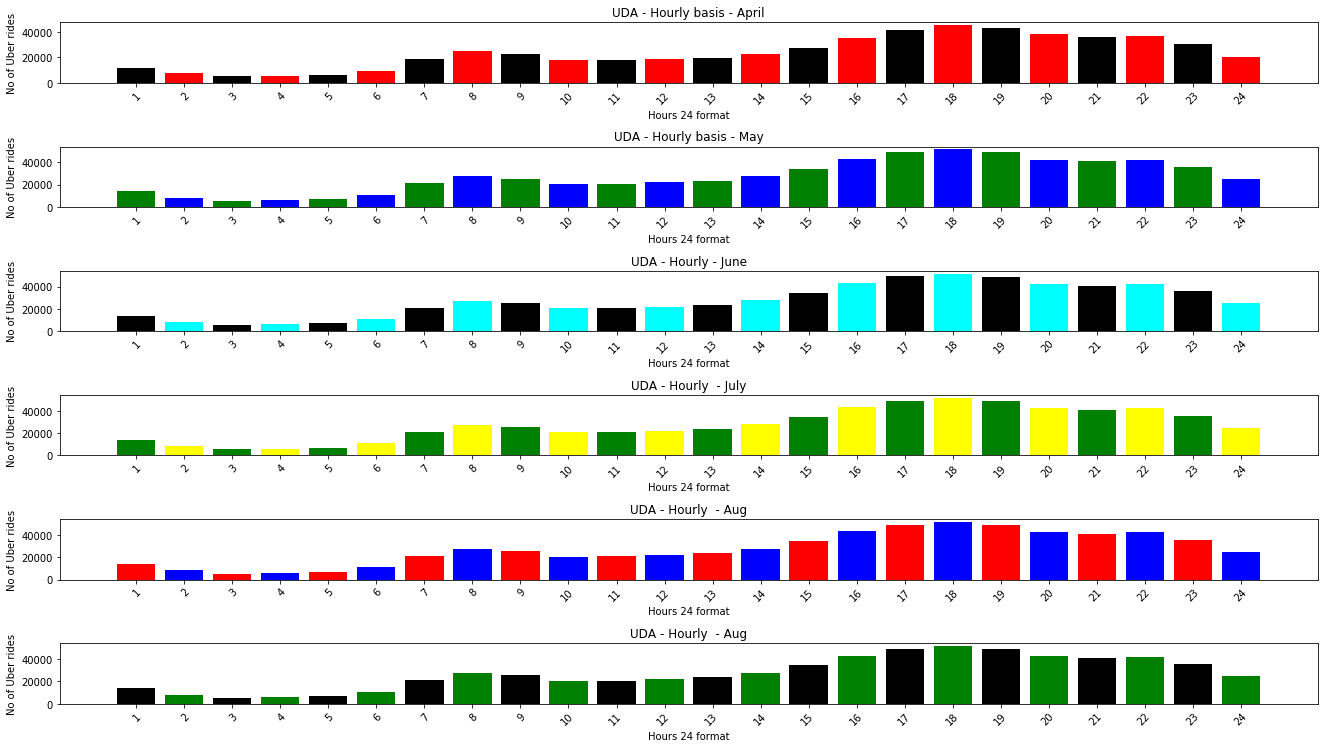

In [274]:
#GRAPHS
from matplotlib.pyplot import figure
# pprint(total_data)
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
fig, (ax_april, ax_may , ax_june, ax_july, ax_aug, ax_sep) = plt.subplots(6)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
my_bins = [i for i in range(1,25)]

# def daily_of_each_month():
#     for each in total_data:
#         data = total_data[each]['days']
    
# Month wise all rides April
ax_april.title.set_text("UDA - Hourly basis - April") 
ax_april.set_xlabel('Hours 24 format')
ax_april.set_ylabel('No of Uber rides')
april_data = total_data[4]['hours']
ax_april.bar(my_bins, april_data, color=['black', 'red'])
ax_april.set_xticks(my_bins)
ax_april.set_xticklabels(my_bins,rotation=45, rotation_mode="anchor", ha="right")

# May
ax_may.title.set_text("UDA - Hourly basis - May") 
ax_may.set_xlabel('Hours 24 format')
ax_may.set_ylabel('No of Uber rides')
# Month wise all rides
may_data = total_data[5]['hours']
ax_may.bar(my_bins, may_data, color=['green', 'blue'])
ax_may.set_xticks(my_bins)
ax_may.set_xticklabels(my_bins,rotation=45, rotation_mode="anchor", ha="right")

#June
ax_june.title.set_text("UDA - Hourly - June") 
ax_june.set_xlabel('Hours 24 format')
ax_june.set_ylabel('No of Uber rides')
j_data = total_data[5]['hours']
ax_june.bar(my_bins, j_data, color=['black', 'cyan'])
ax_june.set_xticks(my_bins)
ax_june.set_xticklabels(my_bins,rotation=45, rotation_mode="anchor", ha="right")

ax_july.title.set_text("UDA - Hourly  - July") 
ax_july.set_xlabel('Hours 24 format')
ax_july.set_ylabel('No of Uber rides')
jul_data = total_data[5]['hours']
ax_july.bar(my_bins, jul_data, color=['green', 'yellow'])
ax_july.set_xticks(my_bins)
ax_july.set_xticklabels(my_bins,rotation=45, rotation_mode="anchor", ha="right")

# August
ax_aug.title.set_text("UDA - Hourly  - Aug") 
ax_aug.set_xlabel('Hours 24 format')
ax_aug.set_ylabel('No of Uber rides')
a_data = total_data[5]['hours']
ax_aug.bar(my_bins, a_data, color=['red', 'blue'])
ax_aug.set_xticks(my_bins)
ax_aug.set_xticklabels(my_bins,rotation=45, rotation_mode="anchor", ha="right")

# Sep
ax_sep.title.set_text("UDA - Hourly  - Aug") 
ax_sep.set_xlabel('Hours 24 format')
ax_sep.set_ylabel('No of Uber rides')
s_data = total_data[5]['hours']
ax_sep.bar(my_bins, s_data, color=['black', 'green'])
ax_sep.set_xticks(my_bins)
ax_sep.set_xticklabels(my_bins,rotation=45, rotation_mode="anchor", ha="right")

plt.tight_layout()
plt.show()
fig.savefig('Histogram-Hourly.png', dpi=100)

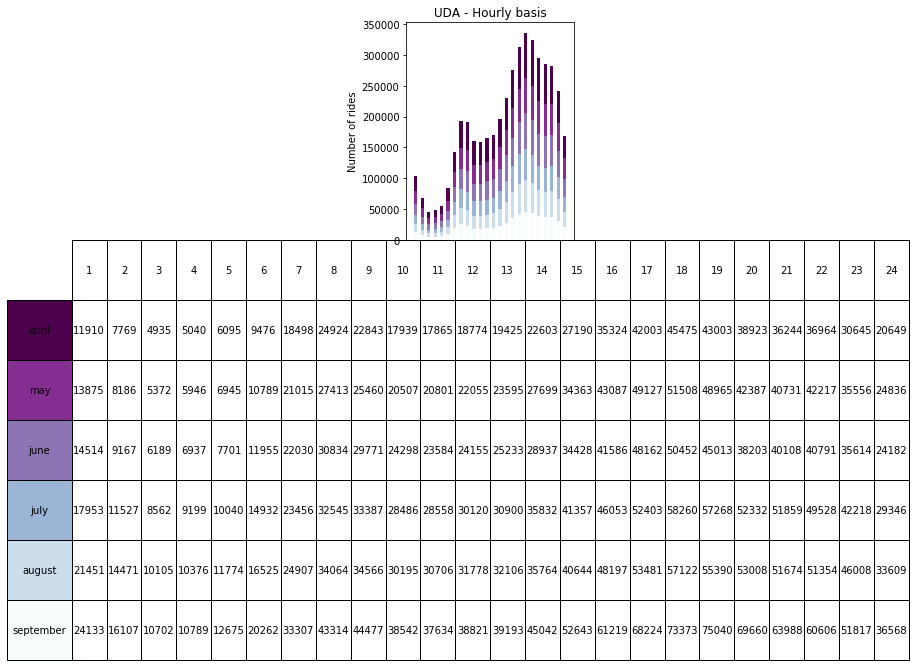

<Figure size 144x72 with 0 Axes>

In [267]:
# Hourly cumulative table graph

data = []
for i, row in enumerate(total_data):
    m = total_data[row]['hours']
    data.append(m)

columns = [i for i in range(1,25)]
rows = ['april' , 'may', 'june', 'july', 'august', 'september']


fig = plt.figure(figsize=(3,4))
ax = fig.add_subplot(111)

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 1, len(rows)))
n_rows = len(total_data)

index = np.arange(len(columns))
bar_width = 0.5

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table

for row in range(n_rows):
    ax.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]

# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]


# Add a table at the bottom of the axes
the_table = ax.table(cellText=data,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom', 
                    cellLoc = 'center', rowLoc = 'center')

the_table.auto_set_font_size(False)
the_table.set_fontsize(10)
the_table.scale(5,5)

# Adjust layout to make room for the table:
# ax.subplots_adjust(left=0.5, bottom=0.5)

ax.set_ylabel("Number of rides")
# plt.yticks(values * value_increment, ['%d' % val for val in values])
ax.set_xticks([])
ax.title.set_text("UDA - Hourly basis")

plt.show()
plt.savefig('test.png')

<Figure size 1600x800 with 0 Axes>

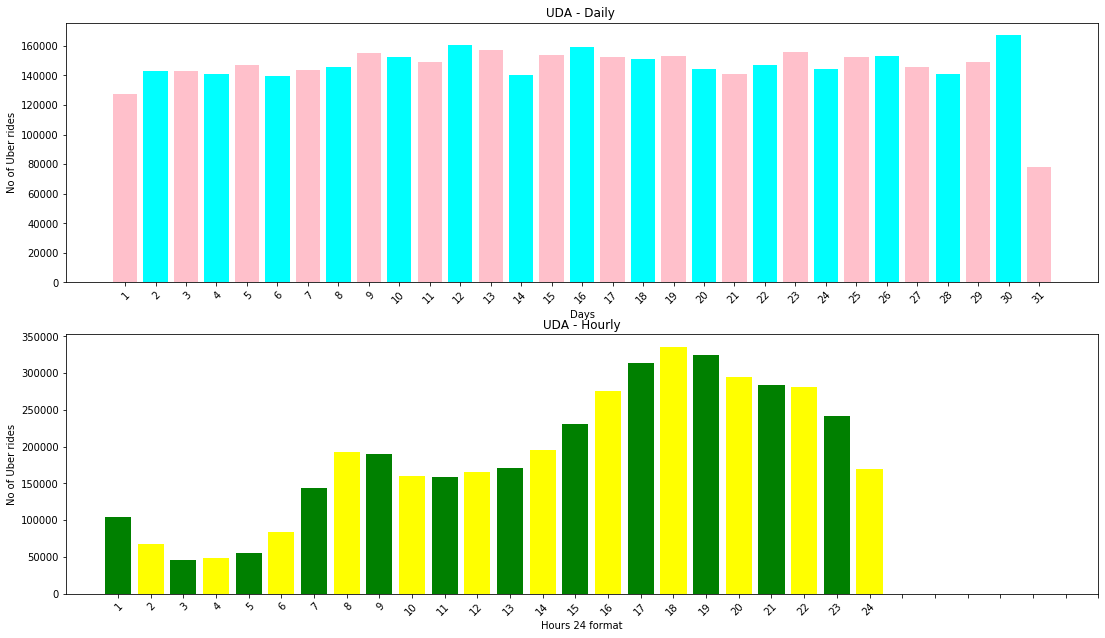

In [268]:
# Daily uber rides
#GRAPHS
from matplotlib.pyplot import figure
my_bins = [i for i in range(1,32)]
bins = [i for i in range(1,25)]
a_data = [0]*31
h_data = [0]*24
days, hours = [], []
for each in total_data:
    days = total_data[each]['days']
    for i,val in enumerate(days):
        a_data[i] = a_data[i] + val
        
for each in total_data:
    hours = total_data[each]['hours']
    for i,val in enumerate(hours):
        h_data[i] = h_data[i] + val
        
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
fig, (ax_d, ax_h) = plt.subplots(2)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

# Month wise all rides April
ax_d.title.set_text("UDA - Daily ") 
ax_d.set_xlabel('Days')
ax_d.set_ylabel('No of Uber rides')
ax_d.bar(my_bins, a_data, color=['pink', 'cyan'])
ax_d.set_xticks(my_bins)
ax_d.set_xticklabels(my_bins,rotation=45, rotation_mode="anchor", ha="right")


# Month wise all rides April
ax_h.title.set_text("UDA - Hourly") 
ax_h.set_xlabel('Hours 24 format')
ax_h.set_ylabel('No of Uber rides')
ax_h.bar(bins, h_data, color=['green', 'yellow'])
ax_h.set_xticks(my_bins)
ax_h.set_xticklabels(bins,rotation=45, rotation_mode="anchor", ha="right")

plt.show()
fig.savefig('Total-Uber-rides.png', dpi=100)